## IMPORTING THE NECESSARY LIBRARIES

In [19]:
import datasets
import pandas as pd
import plotly.express as px 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

## LISTING SOME OF THE DATASETS

In [20]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 145341 datasets currently available on the hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


## LOAD THE EMOTION DATASET

In [21]:
from datasets import load_dataset
emotions = load_dataset('emotion')
emotions

C:\Users\joshua.ikiala\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:1486: FutureWarning:

The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.



DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

EXTRACTING EMOTION DATASET

In [22]:
train_ds = emotions["train"]
validate_ds = emotions["validation"]
test_ds = emotions["test"]
print(train_ds)
print(validate_ds)
print(test_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})


In [23]:

# Inspect keys (feature names) of the dataset
keys = emotions['train'].features.keys()
print("Keys (Feature Names):", keys)

# Inspect key-value pairs (feature names and their corresponding values)
items = emotions['train'].features.items()
print("Key-Value Pairs (Feature Names and Values):", items)


Keys (Feature Names): dict_keys(['text', 'label'])
Key-Value Pairs (Feature Names and Values): dict_items([('text', Value(dtype='string', id=None)), ('label', ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None))])


In [24]:
label_names = emotions["train"].features['label'].names
label_names


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [25]:
print("Length of data: ",len(train_ds))
print("Single example by its index in all taken emotion data: ",train_ds[:5])

Length of data:  16000
Single example by its index in all taken emotion data:  {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [26]:
print('Column_Names: ',train_ds.column_names)
print("First five sentences nad label them: ",train_ds[:])
print("First five sentences (Text): ",train_ds['text'][:])

Column_Names:  ['text', 'label']
First five sentences nad label them:  {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too', 'i feel like i have to make the suffering i m seeing mean something', 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter', 'i think it s the easiest tim

DATAFRAME

In [27]:
train = pd.DataFrame(emotions['train'])
train.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

SHOWS THE EMOTIONS VERSUS THEIR RESPECTIVE LABEL NAMES

In [28]:
# Creating a table of emotions vs label names
emotions_table = pd.DataFrame({'Emotions': label_names})
emotions_table.index.name = 'Label Name'
print(emotions_table)


            Emotions
Label Name          
0            sadness
1                joy
2               love
3              anger
4               fear
5           surprise


In [29]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
display(df.tail())
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)
df['label_name'] = df['label'].apply(label_int2str)
display(df.head())

text  label
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

DATA VISUALIZATION


BAR GRAPH

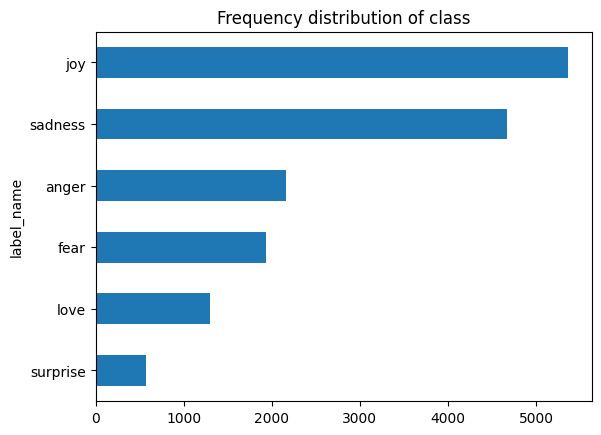

In [30]:
import matplotlib.pyplot as plt 
df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency distribution of class')
plt.show()

HISTOGRAM

In [31]:
#using the pyplot.express library
train['length_of_text'] = [len(i.split(" ")) for i in train['text']]
fig = px.histogram(train['length_of_text'], marginal = 'box', labels = {'value': "length of the text"})
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = ' Description of the length of text by emotions ', title_x = 0.5, title_font = dict(size = 20))
fig.show()

HISTOGRAM WITH COLOUR

In [32]:
fig = px.histogram(train['length_of_text'], marginal = 'box', labels = {'value': "length of the text"} ,color=train['label'])
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = ' Description of the length of text by emotions ', title_x = 0.5, title_font = dict(size = 20))
fig.show()

In [33]:
fig = px.histogram(train, x='label', color= 'label')
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = ' Description of the length of text by emotions ', title_x = 0.5, title_font = dict(size = 20))
fig.show()

## THE FREQUENCY OF WORDS IN THE PHRASES

In [34]:
Freq_of_words = train['text'].str.split(expand=True).stack().value_counts()
Freq_of_words_top500= Freq_of_words[:500]
Freq_of_words_top500



i            25859
feel         11183
and           9589
to            8972
the           8370
             ...  
punished        65
shaken          65
hopeless        65
uncertain       65
surprised       65
Name: count, Length: 500, dtype: int64

## VISUALIZATION
TREEMAPS

In [35]:
import plotly.express as px
fig = px.treemap(Freq_of_words_top200, path=[Freq_of_words_top200.index], values='count')
fig.show()


NameError: name 'Freq_of_words_top200' is not defined

In [ ]:
train.head()

text  label  length_of_text
0                            i didnt feel humiliated      0               4
1  i can go from feeling so hopeless to so damned...      0              21
2   im grabbing a minute to post i feel greedy wrong      3              10
3  i am ever feeling nostalgic about the fireplac...      2              18
4                               i am feeling grouchy      3               4

## TOKENIZATION
SPLITTING SENTENCES INTO WORDS

In [ ]:
def tokenization(inputs):
    return word_tokenize(inputs)
train['tokenized'] = train['text'].apply(tokenization)
train.head()

text  label  length_of_text  \
0                            i didnt feel humiliated      0               4   
1  i can go from feeling so hopeless to so damned...      0              21   
2   im grabbing a minute to post i feel greedy wrong      3              10   
3  i am ever feeling nostalgic about the fireplac...      2              18   
4                               i am feeling grouchy      3               4   

                                           tokenized  
0                       [i, didnt, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [im, grabbing, a, minute, to, post, i, feel, g...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

### REMOVING STOPWORDS
REMOVES THE WORDS WITH LESS MEANING

In [ ]:
stop_words = set(stopwords.words('english'))
def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]
train['text_after_removing_stopwords'] = train['tokenized'].apply(stopwords_remove)
train.head()

text  label  length_of_text  \
0                            i didnt feel humiliated      0               4   
1  i can go from feeling so hopeless to so damned...      0              21   
2   im grabbing a minute to post i feel greedy wrong      3              10   
3  i am ever feeling nostalgic about the fireplac...      2              18   
4                               i am feeling grouchy      3               4   

                                           tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                       text_after_removing_stopwords  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]

## LEMMATIZATION
BREAKDOWN A WORD TO ITS ROOT(LEMMA)

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatization(inputs):
    return [lemmatizer.lemmatize(word = x, pos = 'v') for x in inputs]
train['text_lemmatized'] = train['text_after_removing_stopwords'].apply(lemmatization)
train.head()

text  label  length_of_text  \
0                            i didnt feel humiliated      0               4   
1  i can go from feeling so hopeless to so damned...      0              21   
2   im grabbing a minute to post i feel greedy wrong      3              10   
3  i am ever feeling nostalgic about the fireplac...      2              18   
4                               i am feeling grouchy      3               4   

                                           tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                       text_after_removing_stopwords  \
0                          [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2  [im, grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  
0                           [didnt, feel, humiliate]  
1  [go, feel, hopeless, damn, hopeful, around, so...  
2      [im, grab, minute, post, feel, greedy, wrong]  
3  [ever, feel, nostalgic, fireplace, know, still...  
4                                    [feel, grouchy]

## JOINING TOKENS INTO SENTENCES

In [ ]:
train['text_cleaned'] = train['text_lemmatized'].str.join('')
train.head()

text  label  length_of_text  \
0                            i didnt feel humiliated      0               4   
1  i can go from feeling so hopeless to so damned...      0              21   
2   im grabbing a minute to post i feel greedy wrong      3              10   
3  i am ever feeling nostalgic about the fireplac...      2              18   
4                               i am feeling grouchy      3               4   

                                           tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                       text_after_removing_stopwords  \
0                          [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2  [im, grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  \
0                           [didnt, feel, humiliate]   
1  [go, feel, hopeless, damn, hopeful, around, so...   
2      [im, grab, minute, post, feel, greedy, wrong]   
3  [ever, feel, nostalgic, fireplace, know, still...   
4                                    [feel, grouchy]   

                                      text_cleaned  
0                               didntfeelhumiliate  
1  gofeelhopelessdamnhopefularoundsomeonecareawake  
2                  imgrabminutepostfeelgreedywrong  
3      everfeelnostalgicfireplaceknowstillproperty  
4                                      feelgrouchy

## WORDCLOUD

# TO MAP THE SENTENCES INTO A GRAPH

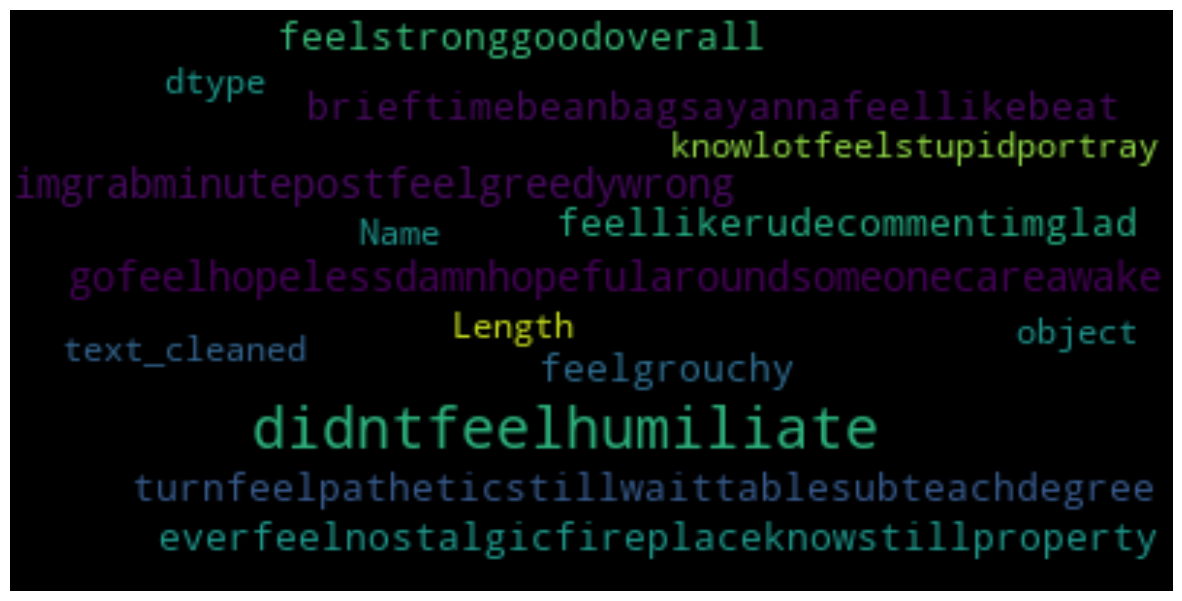

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud( max_words=200, random_state=30, collocations = True).generate(str(train['text_cleaned']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


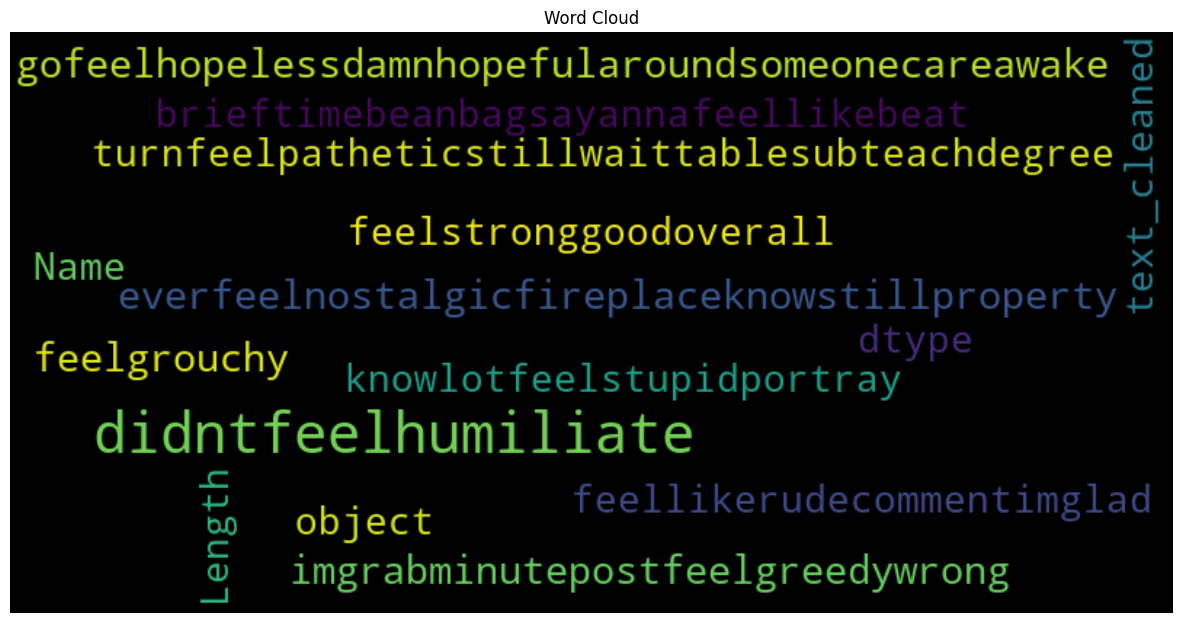

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_words=200, random_state=1, collocations=True, width=800, height=400).generate(str(train['text_cleaned']))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
